# HR Analytics Project- Understanding the Attrition in HR
## Project Description
## Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
## HR Analytics
### Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
## Attrition in HR
### Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
## How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
## Attrition affecting Companies
#### A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


# 1. Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

## 2. Load dataset : 

In [2]:
df = pd.read_csv('/Users/sneha/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Drop EmployeeNumber as it is unique Identity for every row. 

In [6]:
df = df.drop(columns = 'EmployeeNumber')

## 4. Check for null values 

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## 5. Object data type exploration 

In [9]:
# Select columns with object data type
object_columns = df.select_dtypes(include=['object'])

object_columns.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Value counts for column 'Attrition':
No     1233
Yes     237
Name: Attrition, dtype: int64


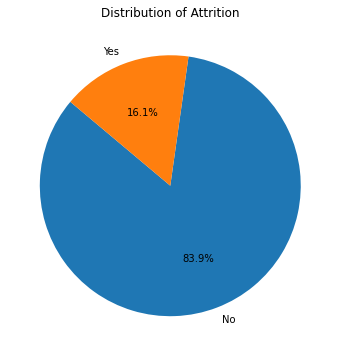

Value counts for column 'BusinessTravel':
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


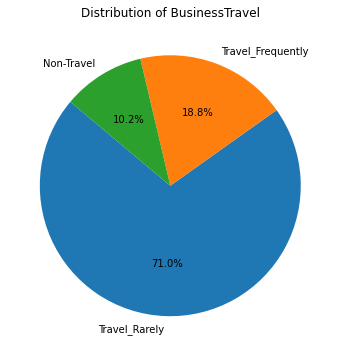

Value counts for column 'Department':
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


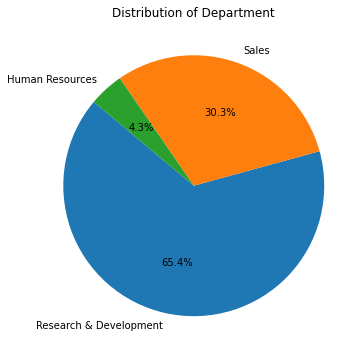

Value counts for column 'EducationField':
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


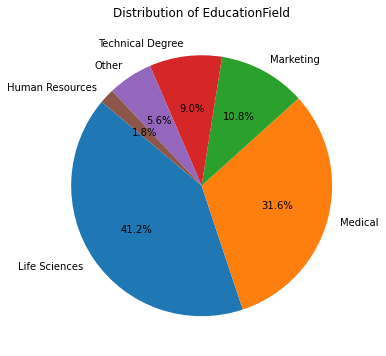

Value counts for column 'Gender':
Male      882
Female    588
Name: Gender, dtype: int64


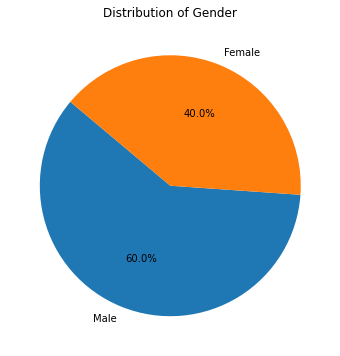

Value counts for column 'JobRole':
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


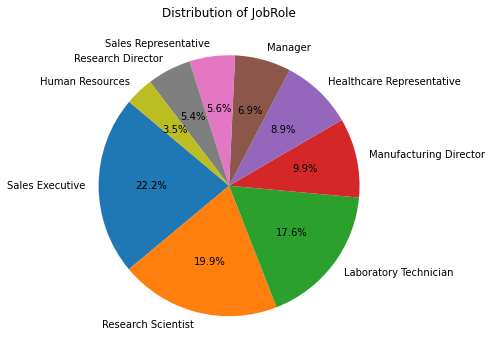

Value counts for column 'MaritalStatus':
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


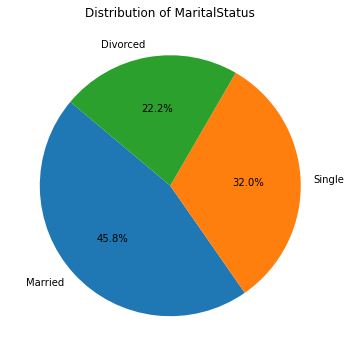

Value counts for column 'Over18':
Y    1470
Name: Over18, dtype: int64


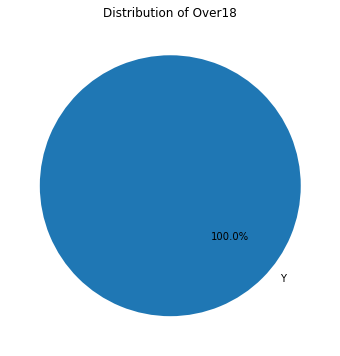

Value counts for column 'OverTime':
No     1054
Yes     416
Name: OverTime, dtype: int64


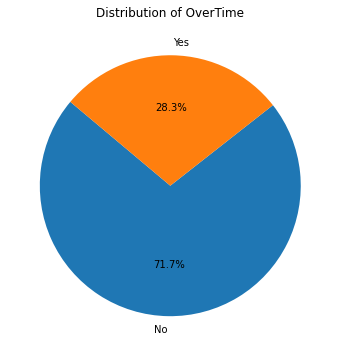

In [10]:
for column in object_columns.columns:
    # Print value counts
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.show()

### Dropping Over18 as it has only 1 unique value : 


## 6. Selecting categorical integer 

In [11]:
# Get the column names of integer columns where the condition is met
categorical_int = [col for col in df.select_dtypes(include=['int64']).columns if df[col].nunique() < 45]

# Display the selected column names
print(categorical_int)
 

['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Value counts for column 'Age':
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


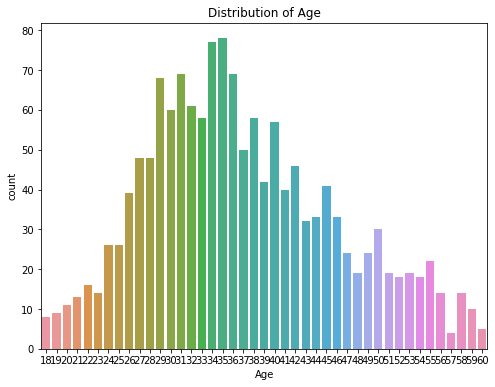

Value counts for column 'DistanceFromHome':
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


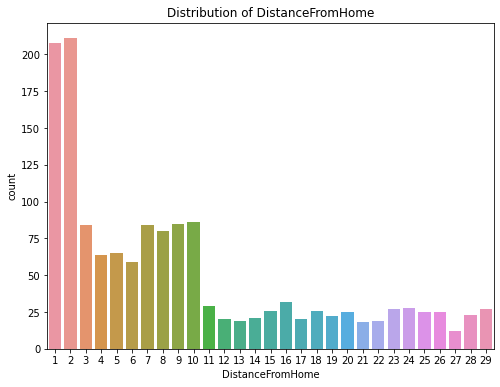

Value counts for column 'Education':
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


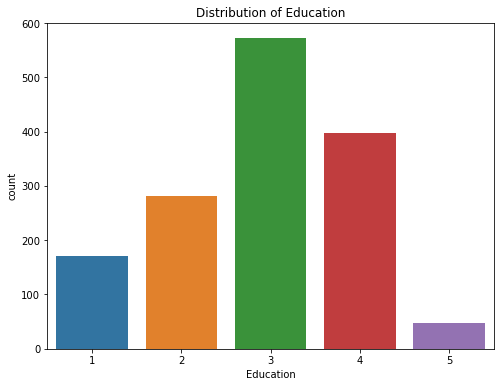

Value counts for column 'EmployeeCount':
1    1470
Name: EmployeeCount, dtype: int64


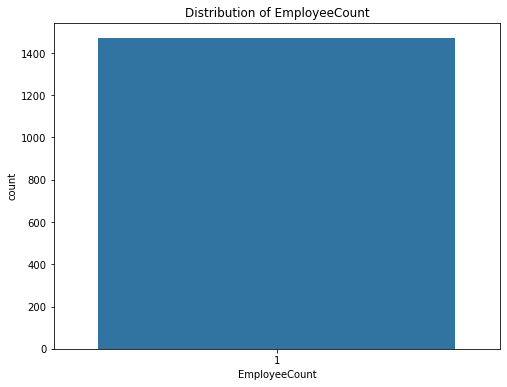

Value counts for column 'EnvironmentSatisfaction':
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


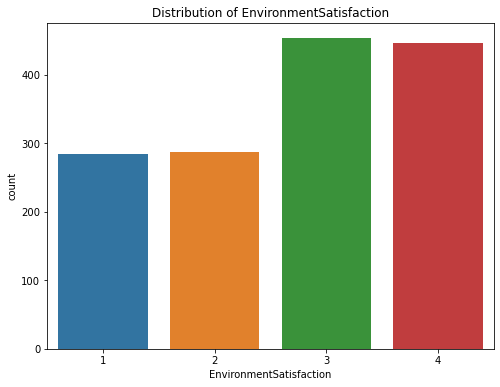

Value counts for column 'JobInvolvement':
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


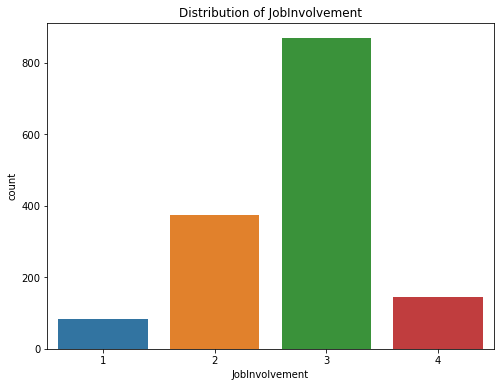

Value counts for column 'JobLevel':
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


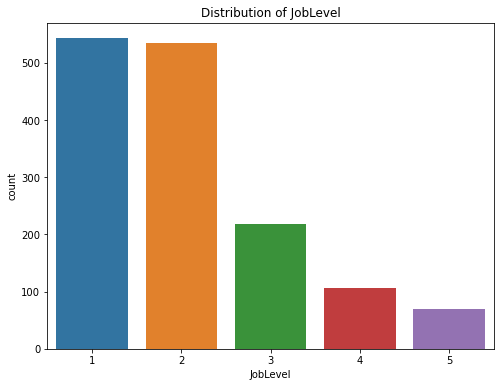

Value counts for column 'JobSatisfaction':
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


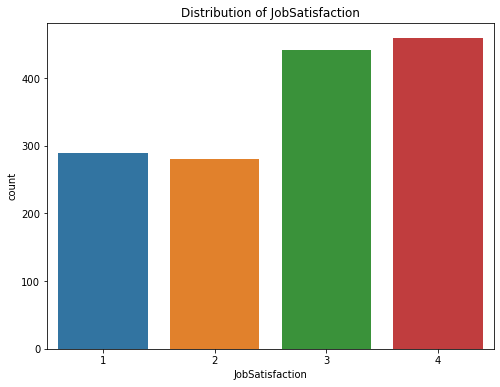

Value counts for column 'NumCompaniesWorked':
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


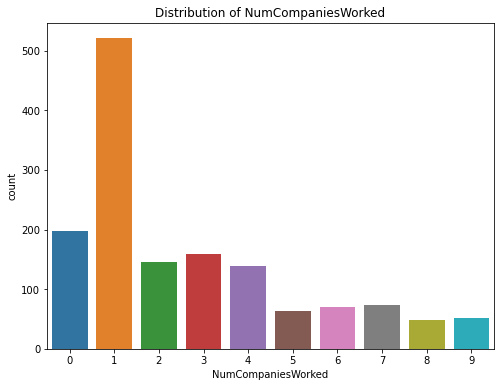

Value counts for column 'PercentSalaryHike':
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


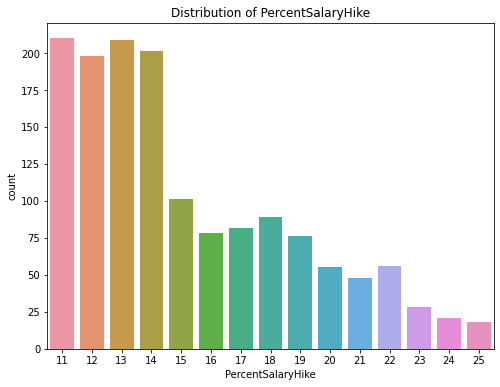

Value counts for column 'PerformanceRating':
3    1244
4     226
Name: PerformanceRating, dtype: int64


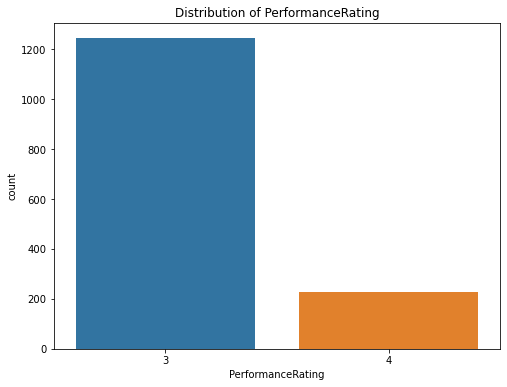

Value counts for column 'RelationshipSatisfaction':
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


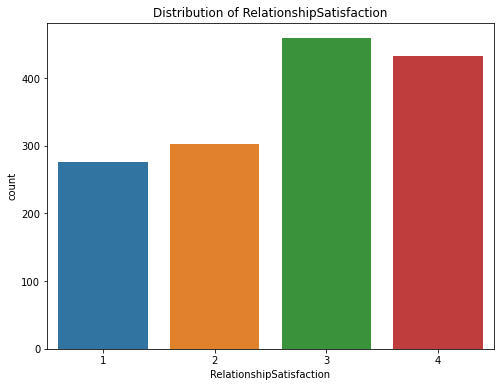

Value counts for column 'StandardHours':
80    1470
Name: StandardHours, dtype: int64


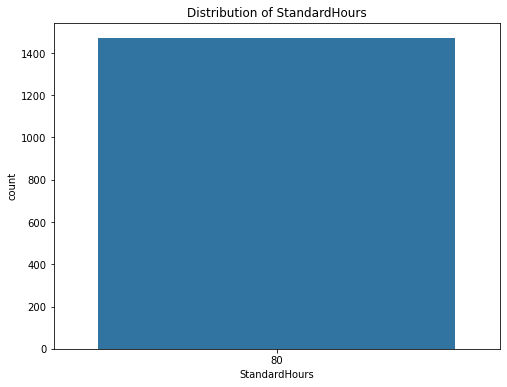

Value counts for column 'StockOptionLevel':
0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


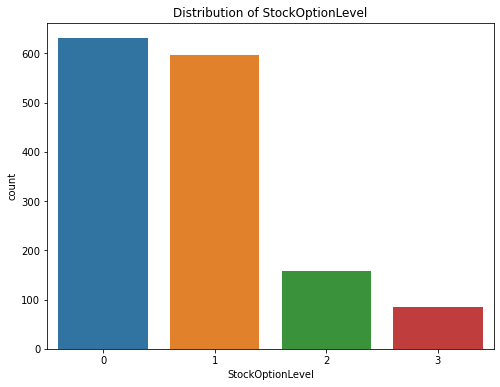

Value counts for column 'TotalWorkingYears':
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


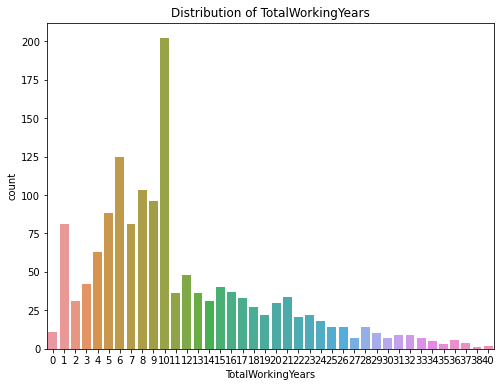

Value counts for column 'TrainingTimesLastYear':
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


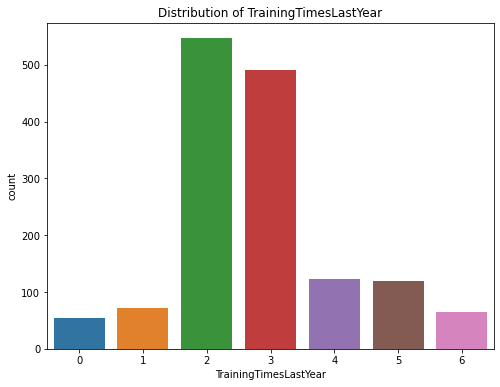

Value counts for column 'WorkLifeBalance':
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


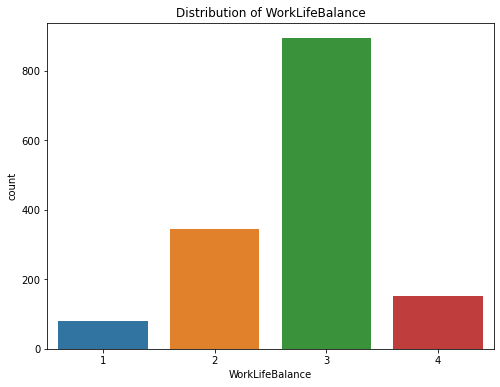

Value counts for column 'YearsAtCompany':
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


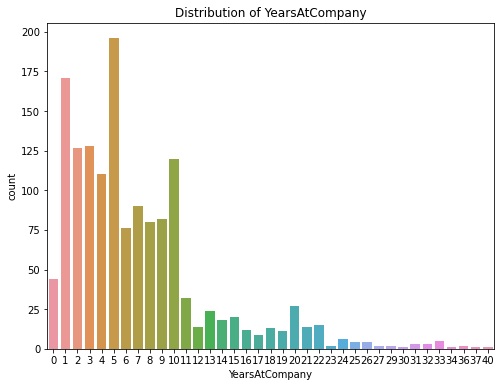

Value counts for column 'YearsInCurrentRole':
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


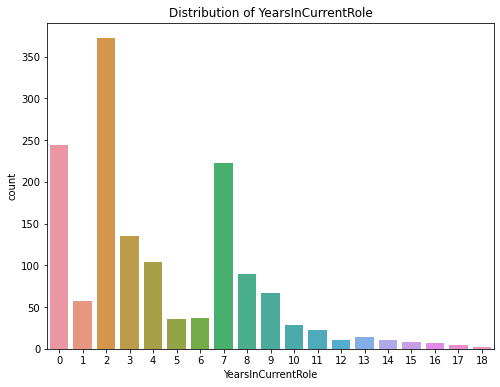

Value counts for column 'YearsSinceLastPromotion':
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


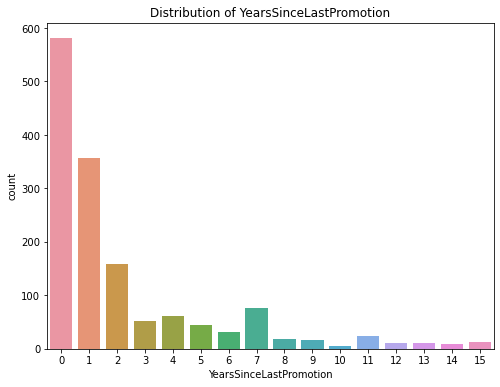

Value counts for column 'YearsWithCurrManager':
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


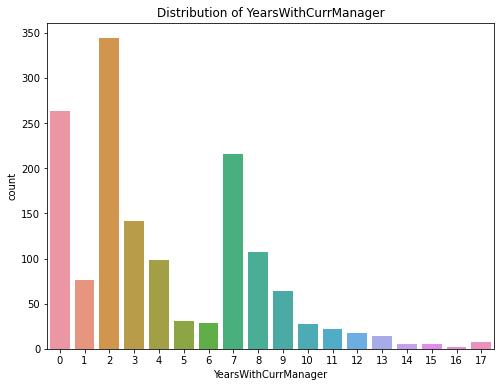

In [12]:
for column in categorical_int:
    # Print value counts
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

### Dropping StandardHours and EmployeeCount has they have only 1 unique value. 

In [13]:
df = df.drop(columns=['Over18','EmployeeCount','StandardHours'])

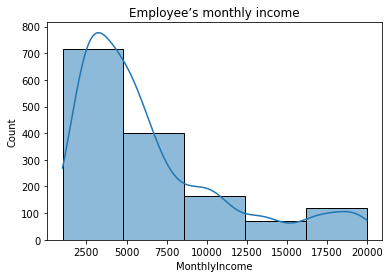

In [14]:
sns.histplot(df['MonthlyIncome'], bins=5, kde=True,)
plt.title("Employee’s monthly income")
plt.show()

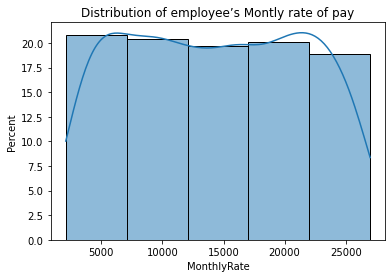

In [15]:
sns.histplot(df['MonthlyRate'], kde=True, bins=5, stat='percent')
plt.title("Distribution of employee’s Montly rate of pay")
plt.show()

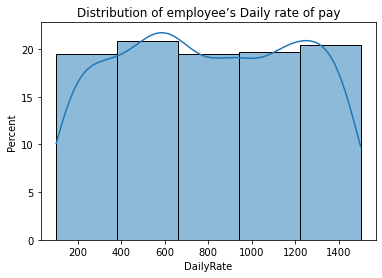

In [16]:
sns.histplot(df['DailyRate'], kde=True, bins=5, stat='percent')
plt.title("Distribution of employee’s Daily rate of pay")
plt.show()

## Conclusion: 


1. **Education:** This column likely represents the level of education of the employees. It may have numerical codes corresponding to different education levels (e.g., 1 for high school, 2 for bachelor's degree, 3 for master's degree, etc.).

2. **EmployeeCount:** This column appears to have only one unique value, indicating that there's only one count for employees. It might not provide meaningful information for analysis.

3. **EnvironmentSatisfaction:** This column may represent the employees' satisfaction with their work environment. It might have numerical ratings (e.g., 1 for very dissatisfied, 2 for somewhat dissatisfied, 3 for neutral, 4 for somewhat satisfied, and 5 for very satisfied).

4. **JobInvolvement:** This column could indicate the level of job involvement or engagement of the employees. It might have numerical ratings representing different levels of involvement.

5. **JobLevel:** This column may represent the job level or hierarchical position of the employees within the organization. It might have numerical codes for different job levels (e.g., 1 for entry-level, 2 for intermediate, 3 for mid-level, etc.).

6. **JobSatisfaction:** This column likely represents the employees' job satisfaction. It might have numerical ratings (similar to EnvironmentSatisfaction) indicating different levels of satisfaction.

7. **NumCompaniesWorked:** This column may indicate the number of companies the employees have worked for prior to their current position. It could be used to assess the employees' career stability or mobility.

8. **PercentSalaryHike:** This column could represent the percentage increase in salary that employees received during a salary hike or review cycle. It provides information about salary adjustments.

9. **PerformanceRating:** This column might represent the employees' performance ratings, which could be used in performance evaluations. It's likely to have numerical ratings (e.g., 3 for meets expectations, 4 for exceeds expectations).

10. **RelationshipSatisfaction:** This column may indicate the employees' satisfaction with their work relationships or interactions with colleagues. It might have numerical ratings (similar to JobSatisfaction and EnvironmentSatisfaction).

11. **StandardHours:** This column appears to have only one unique value, indicating that the standard working hours are the same for all employees. It might not provide meaningful information for analysis.

12. **StockOptionLevel:** This column might represent the level or type of stock options or equity compensation offered to employees. It could have numerical values indicating different stock option levels.

13. **TotalWorkingYears:** This column may indicate the total number of years an employee has been in the workforce, including previous jobs. It provides information about employees' overall work experience.

14. **TrainingTimesLastYear:** This column could represent the number of training sessions or courses attended by employees in the last year. It reflects the investment in employee development.

15. **WorkLifeBalance:** This column may indicate employees' perceptions of their work-life balance. It might have numerical ratings (similar to JobSatisfaction and EnvironmentSatisfaction) indicating different levels of work-life balance.

16. **YearsAtCompany:** This column represents the number of years an employee has been with the current company. It provides insights into employee tenure.

17. **YearsInCurrentRole:** This column indicates the number of years an employee has spent in their current role or position within the company.

18. **YearsSinceLastPromotion:** This column may represent the number of years since an employee's last promotion within the company.

19. **YearsWithCurrManager:** This column indicates the number of years an employee has been under their current manager's supervision.

20. Monthly Rate and Daily Rate is almost evenly distributed through the dataset.

## 7. Split the dataset , X and y

In [17]:
X = df.drop(columns ='Attrition')
y = df['Attrition']

## 8. Visualisation by Output :  

<Figure size 720x432 with 0 Axes>

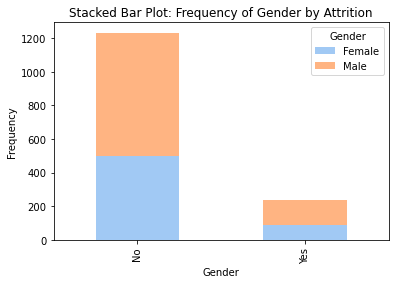

In [18]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Gender']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Gender by Attrition')

# Show the plot
plt.legend(title= 'Gender')
plt.show()

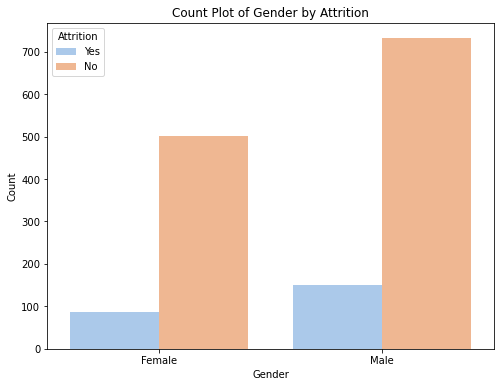

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Gender", hue="Attrition")
plt.title("Count Plot of Gender by Attrition")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

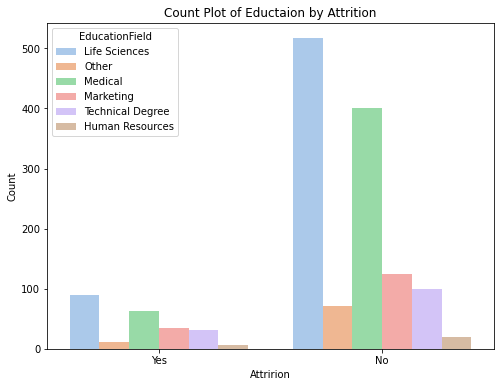

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Attrition", hue="EducationField")
plt.title("Count Plot of Eductaion by Attrition")
plt.xlabel("Attririon")
plt.ylabel("Count")
plt.show()

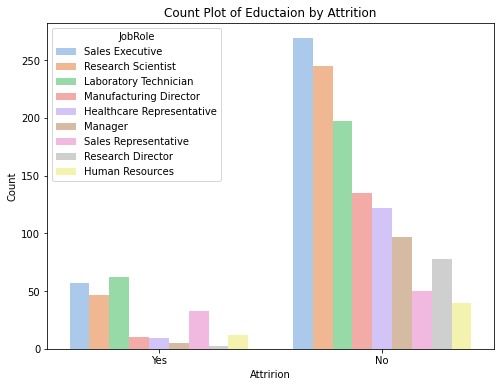

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Attrition", hue="JobRole")
plt.title("Count Plot of Eductaion by Attrition")
plt.xlabel("Attririon")
plt.ylabel("Count")
plt.show()

## Since Attrition == Yes is very small in number comapred to NO. Lets extract the datset for Yes to study what feature is affecting the moset for a Yes. 

In [22]:
attrition_yes_df = X[df['Attrition'] == 'Yes']
print('Shape of Attrition Yes DataFrame:', attrition_yes_df.shape)

Shape of Attrition Yes DataFrame: (237, 30)


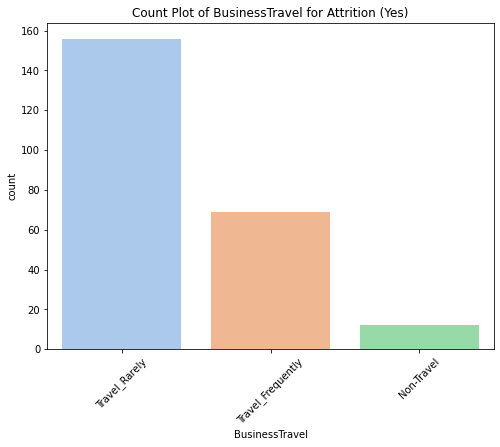

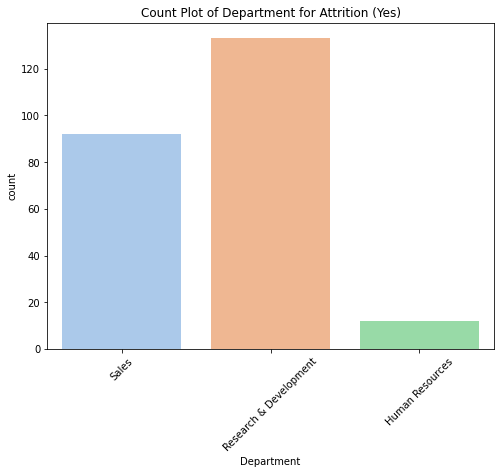

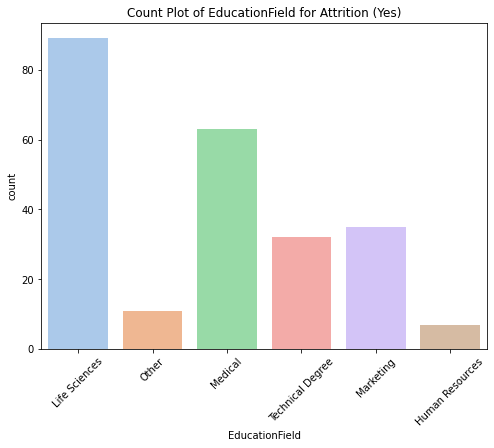

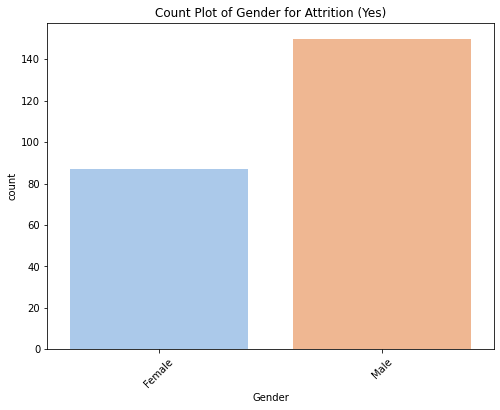

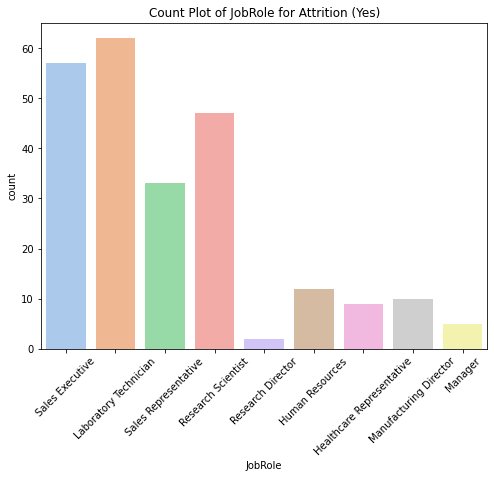

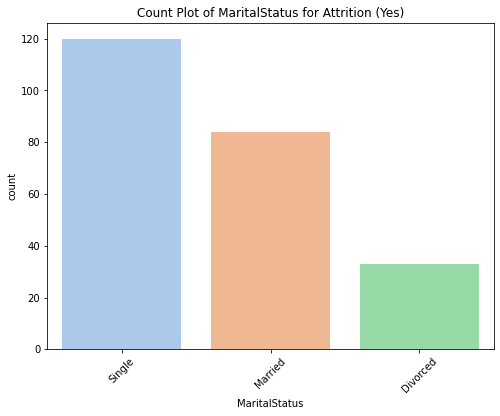

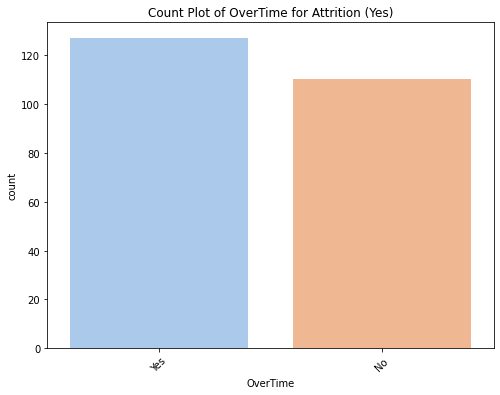

In [23]:
for col in attrition_yes_df :
    if df[col].dtype == 'object':
        # For categorical columns, create a count plot
        plt.figure(figsize=(8, 6))
        sns.countplot(data=attrition_yes_df, x=col)
        plt.title(f'Count Plot of {col} for Attrition (Yes)')
        plt.xticks(rotation=45)

## BusinessTravel - Travel Rarely , Department- Research and development , EductaionField- Life Sciences , Marital Status - Single are contibuting towards a Yes. 

## Categorizing Age for clear understanding : 

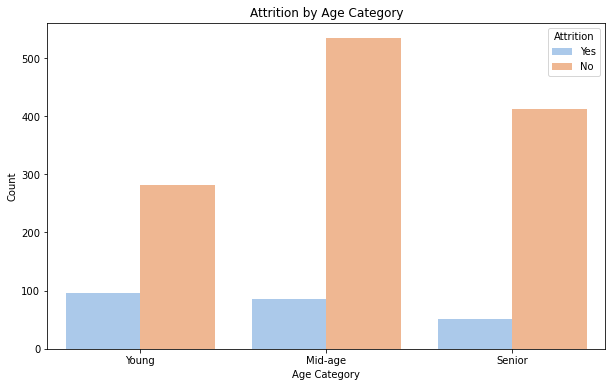

In [24]:
age_bins = [18, 30, 40, 60]
age_labels = ['Young', 'Mid-age', 'Senior']

# Create a new column 'AgeCategory' to represent age bins
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Plot the distribution of Attrition within each age bin
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeCategory', hue='Attrition')
plt.title('Attrition by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

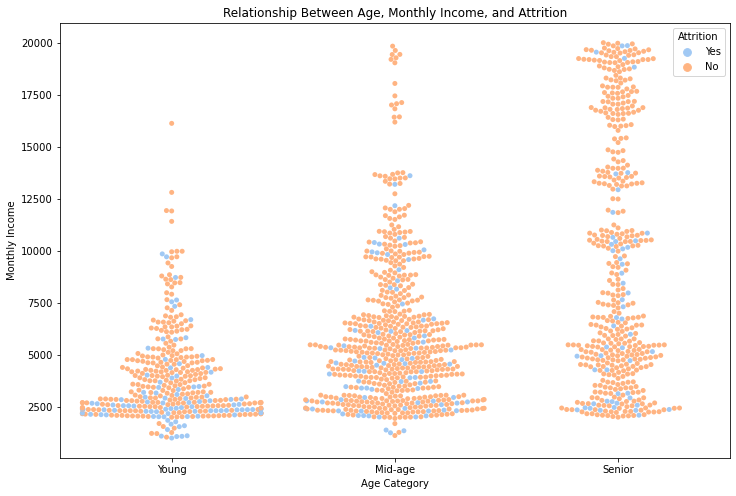

In [25]:
# Create a swarm plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x='AgeCategory', y='MonthlyIncome', hue='Attrition')
plt.title('Relationship Between Age, Monthly Income, and Attrition')
plt.xlabel('Age Category')
plt.ylabel('Monthly Income')
plt.show()

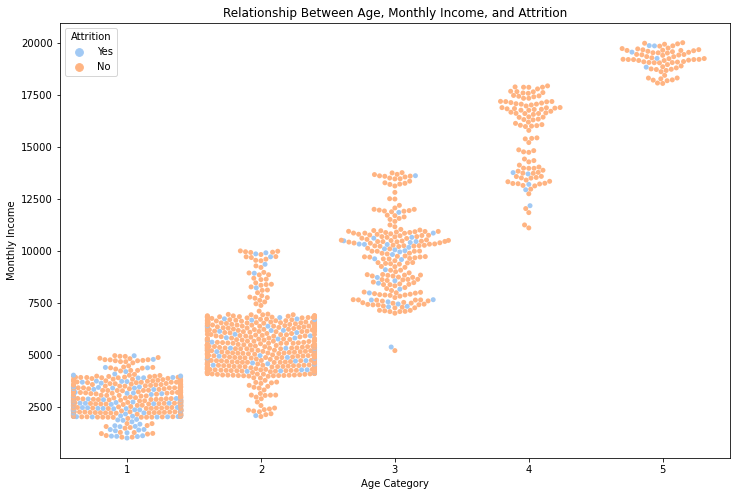

In [26]:
# Create a swarm plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x='JobLevel', y='MonthlyIncome', hue='Attrition')
plt.title('Relationship Between Age, Monthly Income, and Attrition')
plt.xlabel('Age Category')
plt.ylabel('Monthly Income')
plt.show()

## Mostly Young people with less income takes attirition. 

## From this we can see Job Level 1 i.e a Fresher have taken Attrition the most.

## 9. Apply Label encoder to object data type

In [27]:
categorical_columns = df.select_dtypes(include=['object'])

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Label encode each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

    

In [29]:
df['AgeCategory'] = label_encoder.fit_transform(df['AgeCategory'])


In [30]:
df = df.drop(columns = 'Age')

In [31]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeCategory
0,1,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,0,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,1
2,1,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,0
3,0,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,0,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,0
1466,0,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,0
1467,0,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,2
1468,0,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,1


# 10. Check for multicolinearity

In [32]:
df.corr()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeCategory
Attrition,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,...,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.124314
BusinessTravel,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,...,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.034417
DailyRate,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.030589
Department,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,...,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,-0.019402
DistanceFromHome,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.024219
Education,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.215353
EducationField,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,...,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.082469
EnvironmentSatisfaction,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.001815
Gender,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,...,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,0.015194
HourlyRate,-0.006846,0.026528,0.023381,-0.004144,0.031131,0.016775,-0.021941,-0.049857,-0.000478,1.000000,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.016013


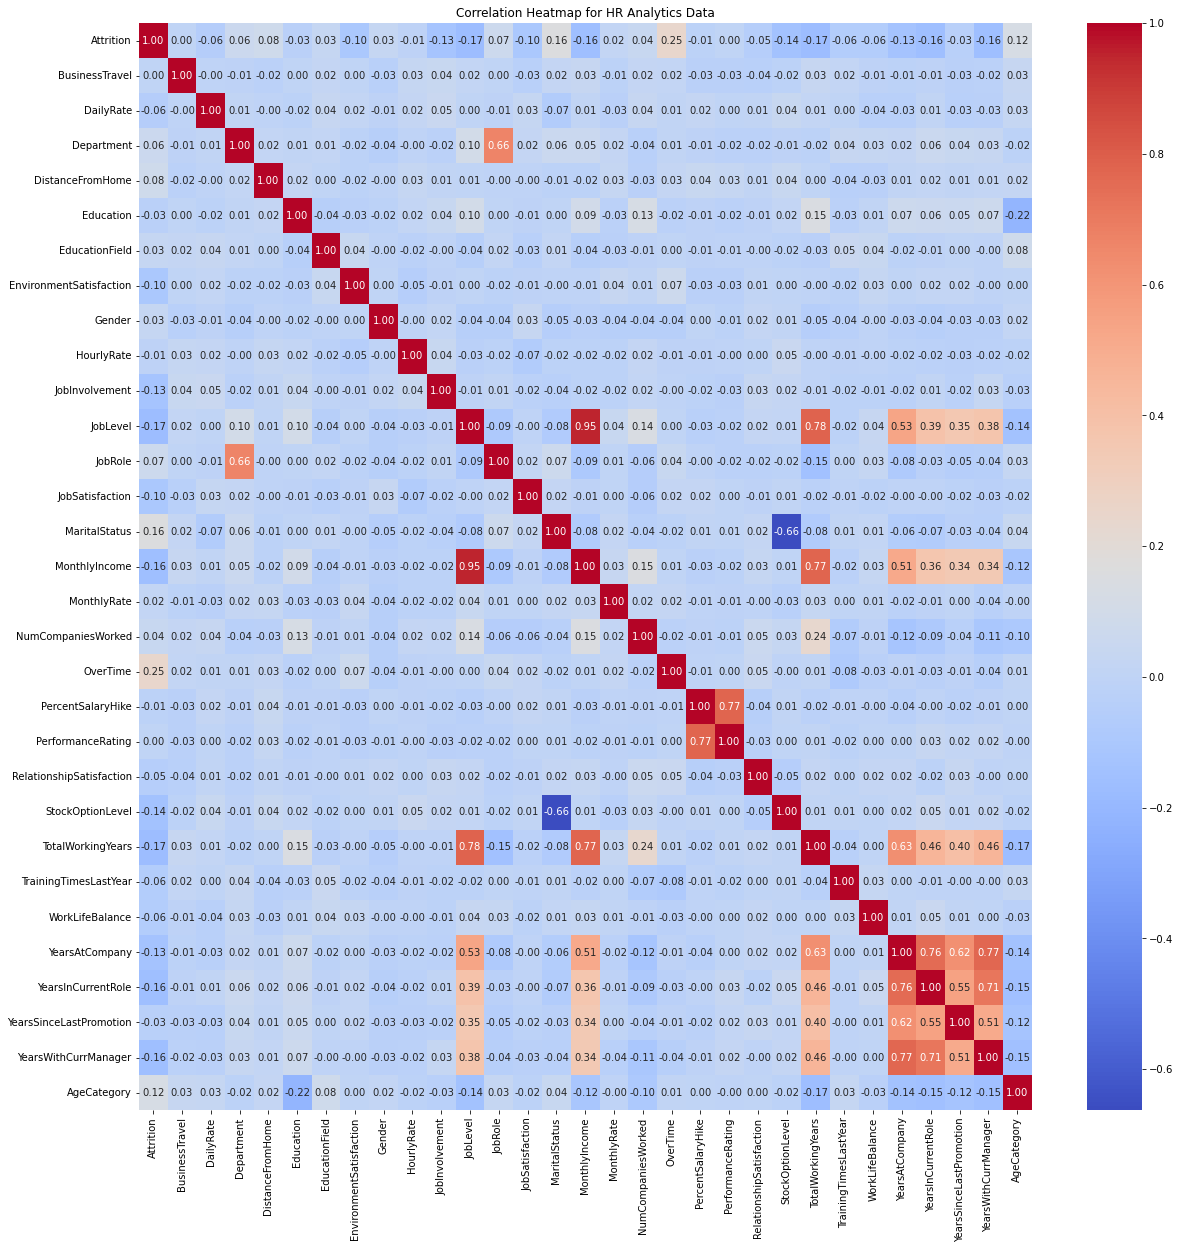

In [33]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for HR Analytics Data')
plt.show()

##  YearsAtCompany	YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager , these 4 columnsa re highly co related we can use one of them or we can apply PCA. 


## Additionally , Hourly Rate, Monthly Income and DailyRate are similar columns 

## Performance Rating and Percent Salary Hike are related to each other. 

## Age Category and Job Levels are similar columns. 

## 11. Check for outliers and drop them.

In [34]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeCategory
26,1,1,1125,1,16,1,1,2,0,72,...,2,0,10,5,3,10,2,6,7,0
45,1,2,1360,1,12,3,5,2,0,49,...,4,0,23,0,3,22,15,15,8,1
62,0,2,989,1,7,2,3,2,0,43,...,4,1,29,2,2,27,3,13,8,1
63,0,2,1435,2,25,3,1,1,0,99,...,4,0,28,3,2,21,16,7,9,1
64,0,2,1223,1,8,3,5,3,0,59,...,2,3,17,2,3,17,14,12,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0,2,119,2,15,4,2,2,1,77,...,1,0,21,3,3,20,8,11,10,0
1414,0,2,1180,1,25,3,3,1,1,84,...,2,0,25,3,3,17,14,12,11,1
1442,1,2,1092,1,1,4,3,1,1,36,...,2,3,4,3,4,2,2,2,2,2
1447,0,0,301,2,15,4,2,4,1,88,...,1,1,15,4,2,15,12,11,11,0


In [35]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

## 11. Redefine X and y 

In [36]:
X = df.drop(columns='Attrition')
y = df['Attrition']

## 12. See for Variance Inflation Score of X 

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                    Variable         VIF
0             BusinessTravel    7.421263
1                  DailyRate    5.105476
2                 Department   14.034120
3           DistanceFromHome    2.302034
4                  Education    9.736023
5             EducationField    3.946988
6    EnvironmentSatisfaction    7.432608
7                     Gender    2.572713
8                 HourlyRate   11.410011
9             JobInvolvement   15.971863
10                  JobLevel   47.299431
11                   JobRole    8.379611
12           JobSatisfaction    7.251336
13             MaritalStatus    5.878679
14             MonthlyIncome   27.585633
15               MonthlyRate    5.019248
16        NumCompaniesWorked    2.701310
17                  OverTime    1.407006
18         PercentSalaryHike   41.512246
19         PerformanceRating  121.219031
20  RelationshipSatisfaction    7.201666
21          StockOptionLevel    3.347113
22         TotalWorkingYears    9.994780
23     TrainingT

## "JobLevel" and "PerformanceRating" have particularly high VIF values, indicating strong multicollinearity with other variables. You may want to consider addressing this multicollinearity by either removing one of these variables or using dimensionality reduction techniques like PCA.
## Several other variables, such as "Department," "HourlyRate," "JobInvolvement," "MonthlyIncome," "PercentSalaryHike," and "WorkLifeBalance," also have relatively high VIF values, suggesting moderate multicollinearity.
## On the other hand, "OverTime" has a relatively low VIF value, indicating low multicollinearity with other variables.

## 13. Standardise the dataset X 

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical columns
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


## 14. Applying PCA to similar set of columns

In [41]:
from sklearn.decomposition import PCA
# Select the four correlated columns
tenure_columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
tenure_data = X_scaled_df[tenure_columns]

# Initialize PCA with one component to reduce to a single column
pca = PCA(n_components=1)

# Fit and transform the selected columns using PCA
X_scaled_df['TotalTenurePCA'] = pca.fit_transform(tenure_data)

# Drop the individual tenure-related columns if you no longer need them
X_scaled_df.drop(tenure_columns, axis=1, inplace=True)


In [46]:
from sklearn.decomposition import PCA
# Select the four correlated columns
Satisfaction_columns = ['RelationshipSatisfaction', 'EnvironmentSatisfaction', 'JobSatisfaction']
sat_data = X_scaled_df[Satisfaction_columns]

# Initialize PCA with one component to reduce to a single column
pca = PCA(n_components=1)

# Fit and transform the selected columns using PCA
X_scaled_df['sat'] = pca.fit_transform(sat_data)

# Drop the individual tenure-related columns if you no longer need them
X_scaled_df.drop(Satisfaction_columns, axis=1, inplace=True)


In [53]:
from sklearn.decomposition import PCA
# Select the four correlated columns
Performance_columns = ['PerformanceRating', 'PercentSalaryHike']
per_data = X_scaled_df[Performance_columns]

# Initialize PCA with one component to reduce to a single column
pca = PCA(n_components=1)

# Fit and transform the selected columns using PCA
X_scaled_df['per'] = pca.fit_transform(per_data)

# Drop the individual tenure-related columns if you no longer need them
X_scaled_df.drop(Performance_columns, axis=1, inplace=True)


In [54]:
X_scaled_df

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobLevel,...,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,AgeCategory,TotalTenurePCA,sat,per
0,0.570012,0.744298,1.444946,-1.004854,-0.908921,-0.947683,-1.244642,1.395974,0.371644,0.041723,...,2.189166,1.654475,-0.947481,-0.349639,-2.200883,-2.519029,0.186755,-0.110981,2.002231,-1.089216
1,-0.978502,-1.316490,-0.501758,-0.111340,-1.907678,-0.947683,0.803444,-0.241545,-1.074487,0.041723,...,-0.672354,-0.604421,0.274271,-0.060892,0.143536,0.344094,0.186755,1.268511,-1.265136,3.510487
2,0.570012,1.422881,-0.501758,-0.877209,-0.908921,1.318193,0.803444,1.296730,-1.074487,-0.943990,...,1.371589,1.654475,-0.947481,-0.494012,0.143536,0.344094,-1.006855,-2.174141,-0.068232,-0.267528
3,-0.978502,1.470457,-0.501758,-0.749564,1.088592,-0.947683,-1.244642,-0.489654,0.371644,-0.943990,...,-0.672354,1.654475,-0.947481,-0.349639,0.143536,0.344094,-1.006855,0.280884,-0.621972,-1.089216
4,0.570012,-0.535244,-0.501758,-0.877209,-1.907678,0.562901,0.803444,-1.283603,0.371644,-0.943990,...,2.597955,-0.604421,0.274271,-0.638385,0.143536,0.344094,1.380366,-1.011987,-0.313604,-0.883794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,-0.978502,0.198427,-0.501758,1.803334,-0.908921,0.562901,0.803444,-1.233981,1.817774,0.041723,...,0.554012,-0.604421,0.274271,0.949720,0.143536,0.344094,-1.006855,-0.849196,0.418985,0.143317
1319,0.570012,-0.480156,-0.501758,-0.366629,-1.907678,0.562901,0.803444,-1.184359,-1.074487,1.027436,...,0.554012,-0.604421,0.274271,-0.205265,1.706481,0.344094,-1.006855,0.945048,-0.644875,-0.267528
1320,0.570012,-1.626986,-0.501758,-0.621919,0.089835,-0.947683,0.803444,1.048621,1.817774,0.041723,...,-0.672354,1.654475,0.274271,-0.638385,-2.200883,0.344094,1.380366,-0.741375,0.318109,2.894221
1321,-0.978502,0.546482,1.444946,-0.877209,0.089835,0.562901,0.803444,-0.142302,-1.074487,0.041723,...,-0.263565,-0.604421,-0.947481,0.949720,0.143536,-1.087467,0.186755,0.998321,-1.740902,-0.472950


## 14. Seeing the features affecting the output 

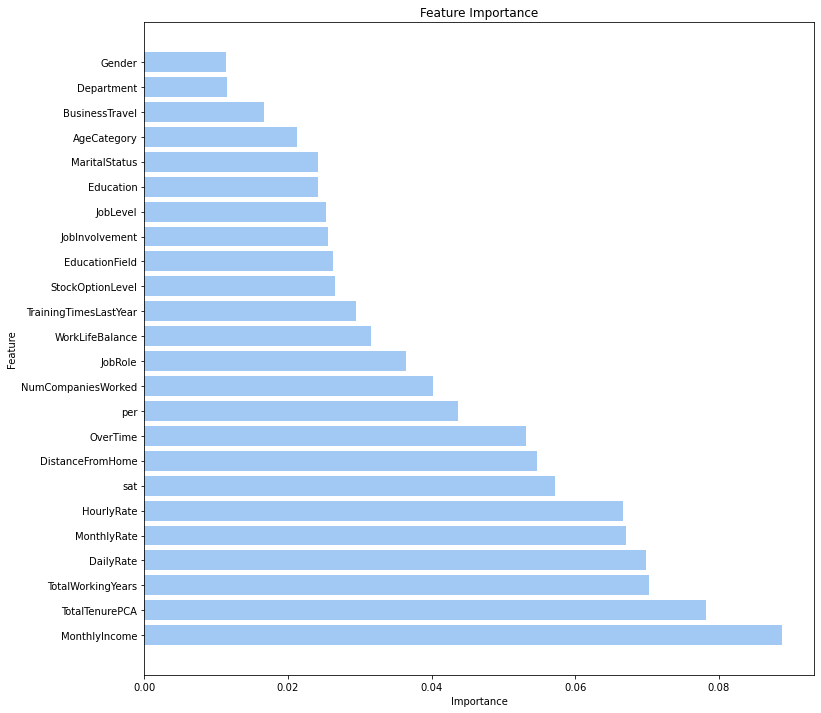

In [55]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to your data

clf.fit(X_scaled_df, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## 15. Creating the Models : 

(1323, 12) (1058, 12) (265, 12)
MODEL NAME :  LogisticRegression() 

               precision    recall  f1-score   support

           0       0.87      0.99      0.92       224
           1       0.73      0.20      0.31        41

    accuracy                           0.86       265
   macro avg       0.80      0.59      0.62       265
weighted avg       0.85      0.86      0.83       265
 





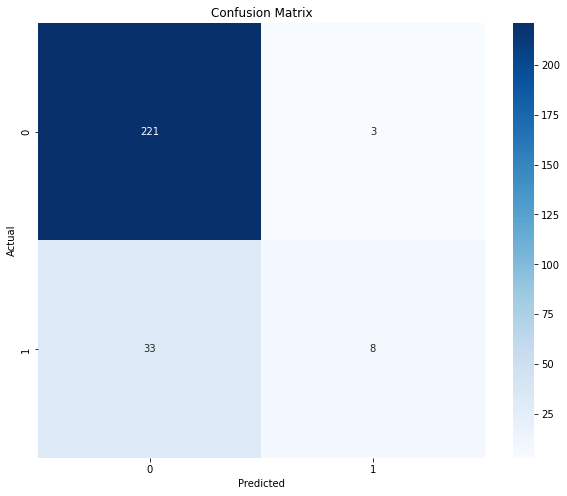

MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 

               precision    recall  f1-score   support

           0       0.86      0.96      0.90       224
           1       0.38      0.15      0.21        41

    accuracy                           0.83       265
   macro avg       0.62      0.55      0.56       265
weighted avg       0.78      0.83      0.80       265
 





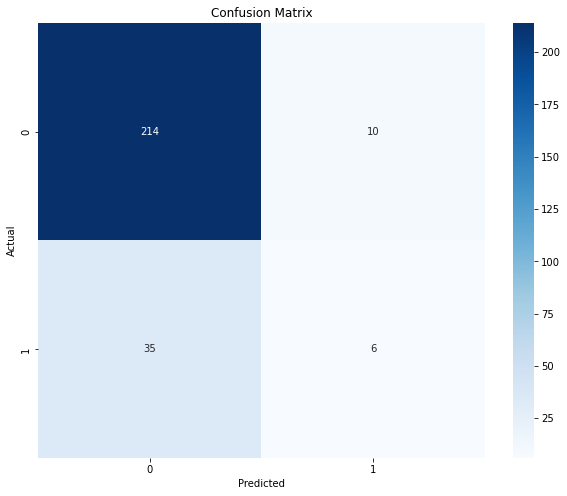

MODEL NAME :  DecisionTreeClassifier(criterion='entropy', random_state=7) 

               precision    recall  f1-score   support

           0       0.88      0.91      0.89       224
           1       0.36      0.29      0.32        41

    accuracy                           0.81       265
   macro avg       0.62      0.60      0.61       265
weighted avg       0.80      0.81      0.80       265
 





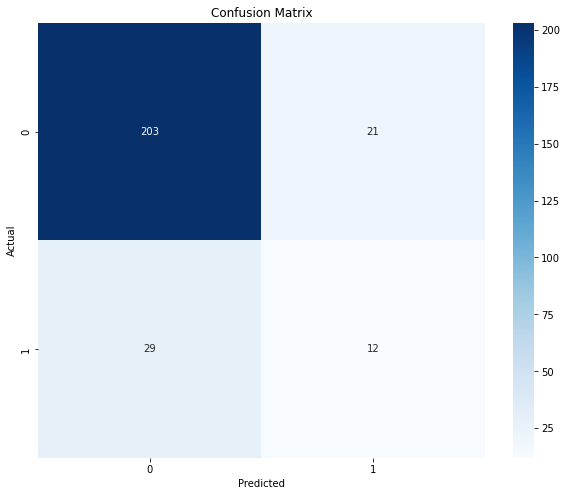

MODEL NAME :  RandomForestClassifier() 

               precision    recall  f1-score   support

           0       0.87      0.99      0.92       224
           1       0.73      0.20      0.31        41

    accuracy                           0.86       265
   macro avg       0.80      0.59      0.62       265
weighted avg       0.85      0.86      0.83       265
 





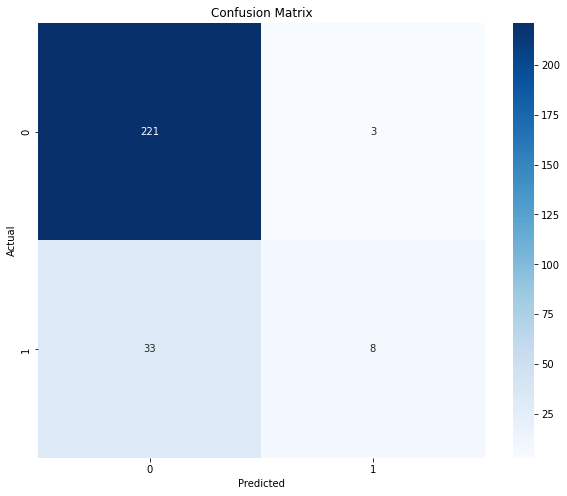

MODEL NAME :  GaussianNB() 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92       224
           1       0.57      0.39      0.46        41

    accuracy                           0.86       265
   macro avg       0.73      0.67      0.69       265
weighted avg       0.84      0.86      0.85       265
 





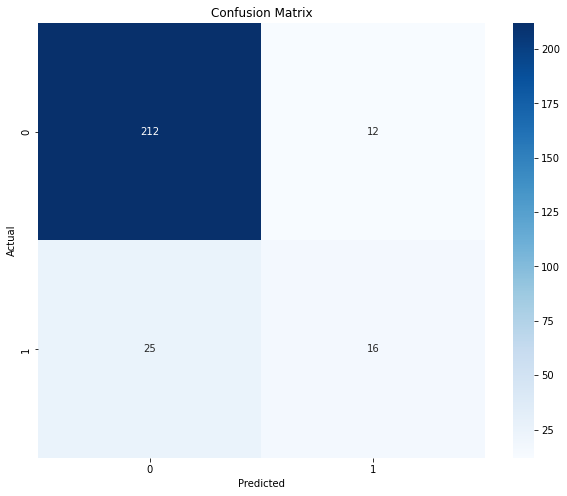

In [77]:
X_data = X_scaled_df.drop(columns=['JobLevel','Gender','Department','BusinessTravel',
                                  'Education','MaritalStatus','HourlyRate','DailyRate',
                                  'StockOptionLevel','sat','JobRole','per'])


from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.2, random_state =1000)

print(X_data.shape, X_train.shape, X_test.shape)

## Creating a pipeline of Models 

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LogisticRegression())

model_pipeline.append(KNeighborsClassifier(n_neighbors=3))

model_pipeline.append(DecisionTreeClassifier(criterion='entropy',random_state=7))

model_pipeline.append(RandomForestClassifier())

model_pipeline.append(GaussianNB())

model_score = []
acc_list = []
##  Fit X train and Y Train to the models in pipeline 

for model in model_pipeline:
    model.fit(X_train,Y_train)    
    y_pred = model.predict(X_test)
    
    model_score.append(model.score(X_train,Y_train))
    
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))
    print("MODEL NAME : ",model,"\n\n",classification_report(Y_test,y_pred),"\n\n\n")
    
    # Create a confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## 16. Print different parameters of Model's Performace 

In [78]:
model_list=['Logistic_Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','GaussianNB']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

,Model,Model_score,Accuracy
0,Logistic_Regression,0.873346,0.864151
1,KNN Classifier,0.905482,0.830189
2,Decision Tree Classifier,1.000000,0.811321
3,Random Forest Classifier,1.000000,0.864151
4,GaussianNB,0.858223,0.860377


## 17  Plot ROC Curve for each model : 
#### ROC is the plot of true positive rate against false positive rate at various classification threshold. 
#### AUC is the area under the ROC curve, and higher AUC indicates better model performance.

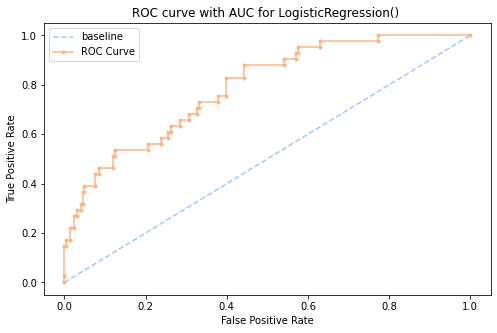

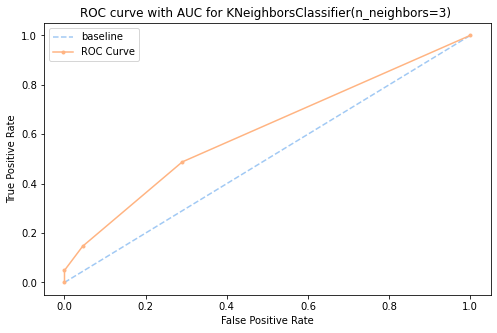

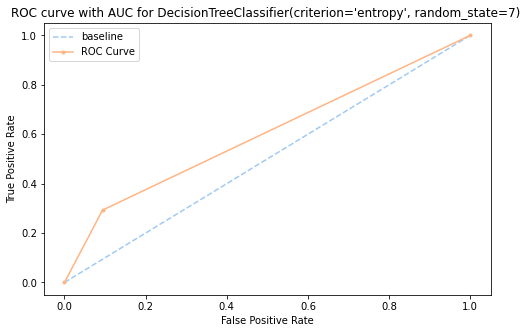

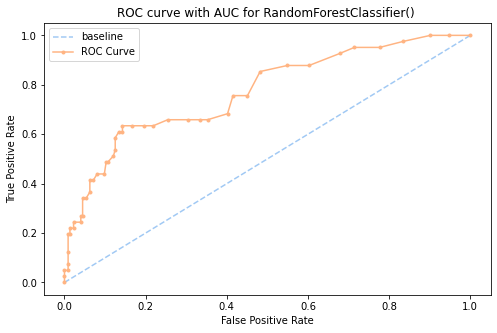

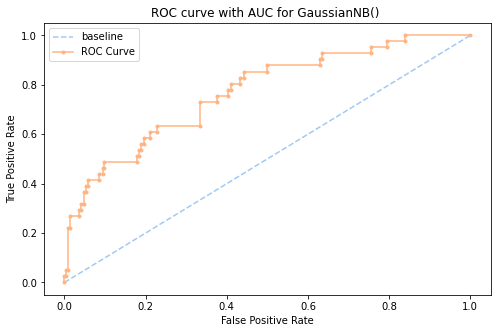

In [79]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_roc=[] # list to store model roc_auc_score 
b_auc=[]
for model in model_pipeline:
    # generate a baseline prediction (majority class)
    baseline_probs = [0 for _ in range(len(Y_test))]
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    auc_roc.append(roc_auc_score(Y_test, probs))
    b_auc.append(roc_auc_score(Y_test,baseline_probs))
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    bl_fpr, bl_tpr, thresholds = roc_curve(Y_test, baseline_probs) 
    # plot the roc curve for the model
    fig = plt.figure(figsize=(8,5))
    plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
    plt.plot(fpr, tpr, marker='.',label='ROC Curve')
    # plot title
    plt.title("ROC curve with AUC for {} ".format(model))
    # axis labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # show the legend
    plt.legend()

In [80]:
AUC_score = pd.DataFrame({'Model':model_list, 'roc_auc_score': auc_roc ,'baseline_auc' :b_auc})
AUC_score

,Model,roc_auc_score,baseline_auc
0,Logistic_Regression,0.789199,0.5
1,KNN Classifier,0.610246,0.5
2,Decision Tree Classifier,0.599466,0.5
3,Random Forest Classifier,0.771831,0.5
4,GaussianNB,0.770906,0.5


## 18  Plot Precision Recall curve for each model :
#### The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

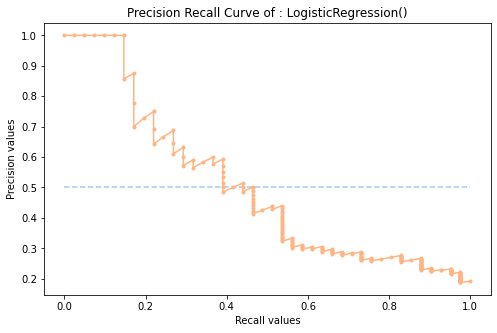

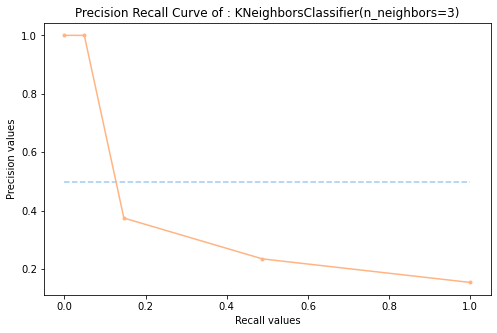

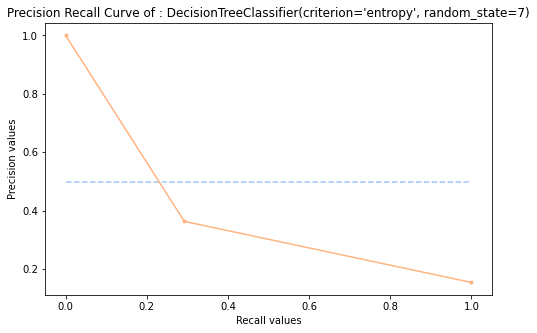

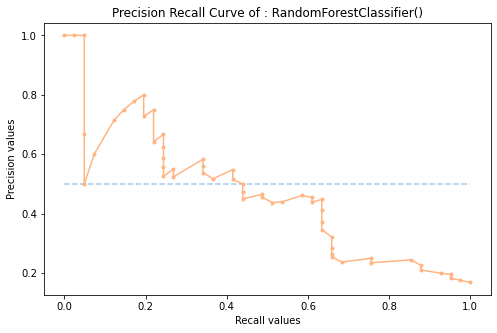

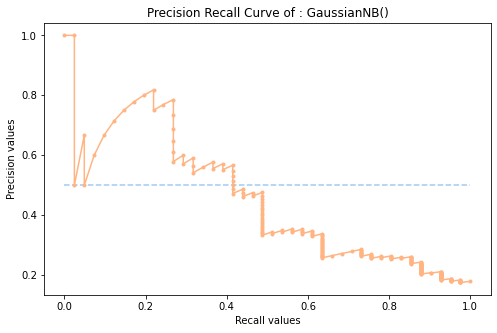

In [81]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


auc_pc=[]
ap=[]
f1=[]
for model in model_pipeline:
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:,1]
    # predict class values
    prediction = model.predict(X_test)
    precision, recall,thresholds = precision_recall_curve(Y_test, probs)
    auc_pc.append(metrics.auc(recall, precision))
    f1.append(f1_score(Y_test, prediction))
    ap.append(average_precision_score(Y_test, probs))
    
    # plot the precision-recall curves
    fig = plt.figure(figsize=(8,5))
    
    plt.ylabel("Precision values")
    plt.xlabel("Recall values")
    
    plt.title("Precision Recall Curve of : %s"%model)
    
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
    plt.plot(recall, precision, marker='.',label="PR curve")


#### Logistic Regrresion covers the larger area under its curve, its AUC score is highest.
#### While, KNN classifier covers the least area under its curve.

## 19 Summarize the Model Evaluation : 

In [82]:
result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

,Model,Model_score,Accuracy,roc_auc_score,f1-score,precision-recall AUC,average precision score
0,Logistic_Regression,0.873346,0.864151,0.789199,0.307692,0.498736,0.503668
1,KNN Classifier,0.905482,0.830189,0.610246,0.210526,0.319931,0.244955
2,Decision Tree Classifier,1.000000,0.811321,0.599466,0.324324,0.382877,0.215864
3,Random Forest Classifier,1.000000,0.864151,0.771831,0.307692,0.461265,0.470140
4,GaussianNB,0.858223,0.860377,0.770906,0.463768,0.452736,0.462615


## So far Logistic Regression looks like a good model , it shows a good fit. Whilts, Random Forest Classifer shows overfitting

## 20. Comapre the models with KNN algorithm. 

LogisticRegression():
 Mean: 0.871508
 Std: (0.018511) 
 Max:(0.901515)


KNeighborsClassifier(n_neighbors=3):
 Mean: 0.850336
 Std: (0.024827) 
 Max:(0.886364)


DecisionTreeClassifier(criterion='entropy', random_state=7):
 Mean: 0.800444
 Std: (0.028157) 
 Max:(0.856061)


RandomForestClassifier():
 Mean: 0.867755
 Std: (0.019560) 
 Max:(0.909091)


GaussianNB():
 Mean: 0.838990
 Std: (0.023265) 
 Max:(0.864662)




Text(0.5, 1.0, 'Model Comparision')

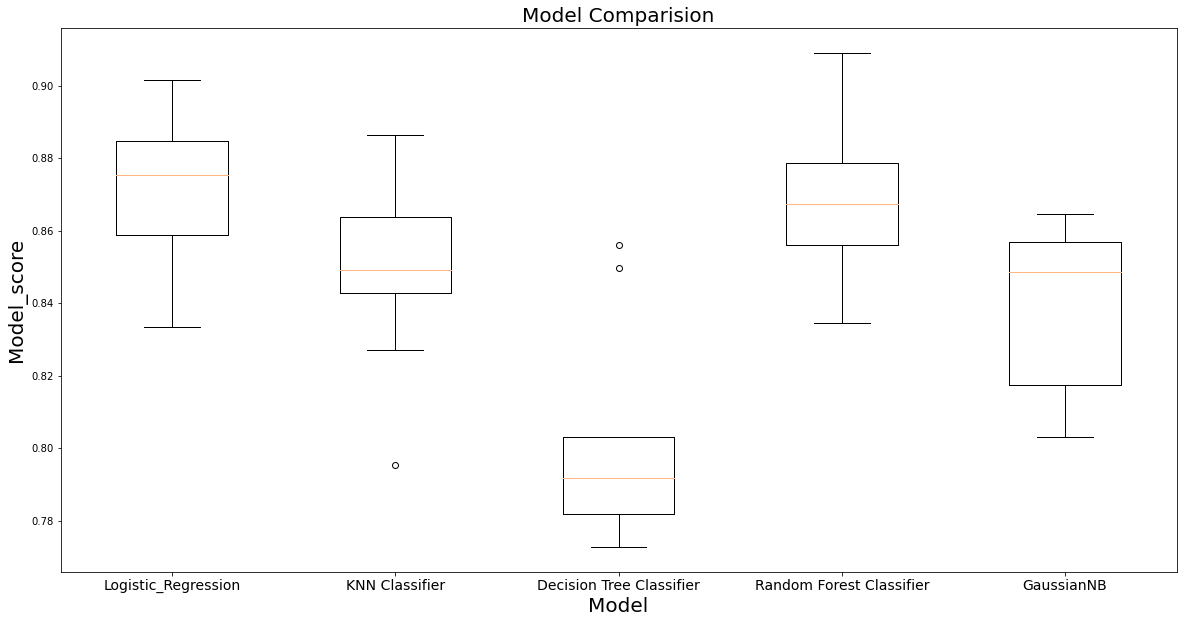

In [83]:
from sklearn import model_selection
seed = 7
results = []
names = [model_list]
scoring = 'accuracy'
for model in model_pipeline:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s:\n Mean: %f\n Std: (%f) \n Max:(%f)\n\n" % (model, cv_results.mean(), cv_results.std(), cv_results.max())
    print(msg)  
fig = plt.figure(figsize=(20,10))
plt.boxplot(results)
plt.ylabel("Model_score",fontsize =20)
plt.xlabel("Model",fontsize=20)
plt.xticks(range(1,len(model_list)+1), model_list,fontsize =14)
plt.title("Model Comparision",fontsize =20)

## Well Both Logistic Regression and Random Forest Classifier gives promising result with a Max Score of 90%.  

## 21. Applying Hyper Parameter Tuning in Logostic Regression.

In [84]:
from sklearn.model_selection import  GridSearchCV

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search through
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear']  # Algorithm to use for optimization
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.8641509433962264


# Conclusion: 
    
For the given dataset, Logistic Regression Model gives a better performance with 87% accuracy. 

In the past I have gained a 90% accuracy too.